In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
def plot_pc_vs_predictor(weight_horsepower_long, pc_col, xlabel):
    """Plot Principal Components 1 or 2 against predictors weight and
    horsepower from the auto dataset
    
    Args:
        weight_horsepower_long (dataframe):
            long form of weights and horsepower that contains columns 'pc1', 
            'pc2', 'variable' and 'value' where variable is an indicator for
            whether value represents weight or horsepower
            
        pc_col (str): 
            column containing values for principal components 1 or 2
            
        xlabel (str): facet grid xlabels
            
    Returns:
        None
    """
    
    pc_predictor_grid = sns.FacetGrid(
        weight_horsepower_long, 
        col='variable', 
        sharey=False,
        height=5, 
        aspect=1
    )
    pc_predictor_grid.map_dataframe(sns.scatterplot, x=pc_col, y='value')
    pc_predictor_grid.set(xlabel=xlabel)
    plt.show()

In [3]:
auto_data = pd.read_csv('../data/auto.csv')

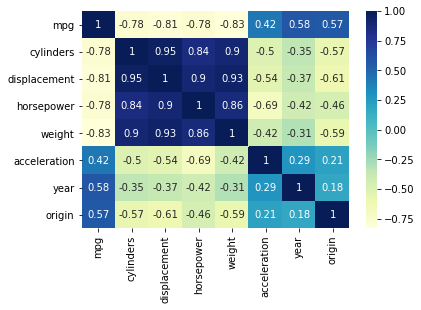

In [4]:
correlation = auto_data.corr()
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.show()

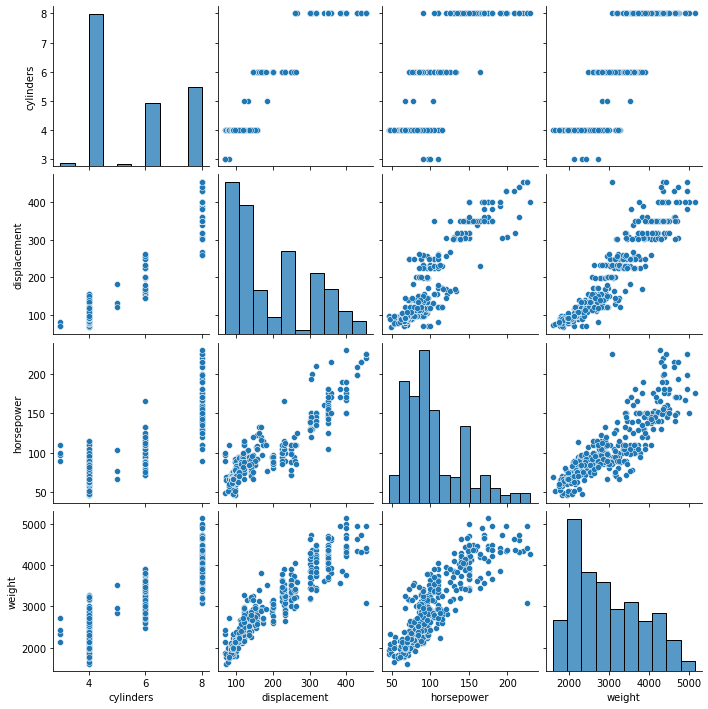

In [5]:
# create subset of variables with high correlation and plot
auto_subset = auto_data[['cylinders', 'displacement', 'horsepower', 'weight']]
sns.pairplot(auto_subset)
plt.show()

In [6]:
# create subset with weight and horsepower
weight_horsepower = auto_subset[['weight', 'horsepower']].copy()
X = weight_horsepower.to_numpy()

# fit pca
num_components = 2
pca_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=num_components))
])
pca_pipe.fit(X)

X_pca = pca_pipe.fit_transform(X)

weight_horsepower['pc1'] = X_pca[:, 0]
weight_horsepower['pc2'] = X_pca[:, 1]

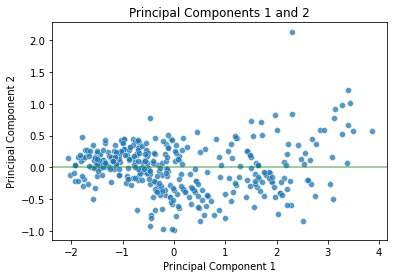

In [7]:
component_plot = sns.scatterplot(
    data=weight_horsepower, 
    x='pc1', y='pc2', 
    alpha=0.75
)
component_plot.set(
    title='Principal Components 1 and 2',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)
plt.axhline(y=0, color='g', alpha=0.5)
plt.show()

In [8]:
# convert weight_horsepower from wide to long
weight_horsepower_long = pd.melt(
    weight_horsepower,
    id_vars=['pc1', 'pc2'], 
    var_name='variable',
    value_name='value',
    ignore_index=False
)

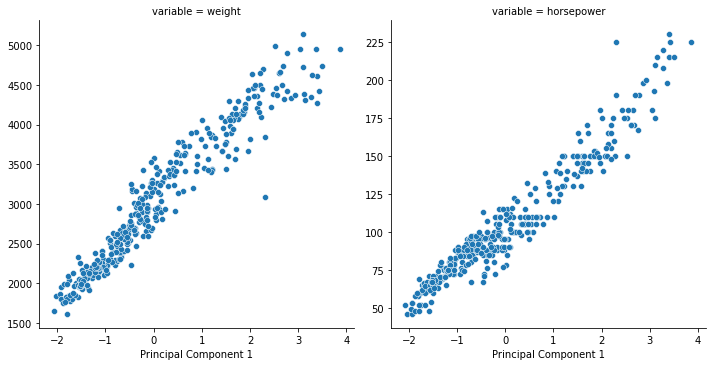

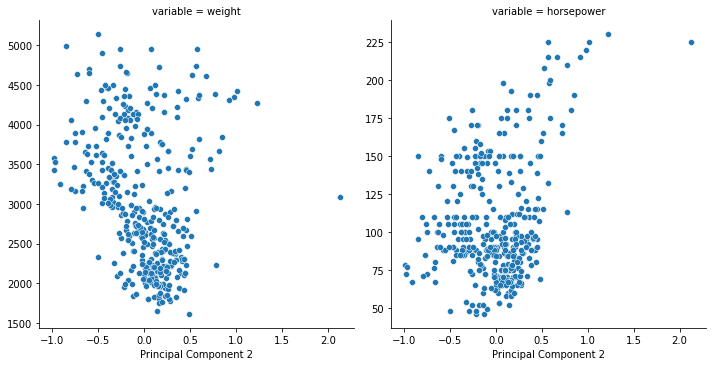

In [9]:
# plot Principal Components 1 and 2 against predictors weight and horsepower
plot_pc_vs_predictor(
    weight_horsepower_long, 
    pc_col='pc1', 
    xlabel='Principal Component 1'
)

plot_pc_vs_predictor(
    weight_horsepower_long, 
    pc_col='pc2', 
    xlabel='Principal Component 2'
)